In [4]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LambdaCallback

# Create output directories
output_dirs = ['setosa', 'versicolor', 'virginica']
for dir_name in output_dirs:
    os.makedirs(dir_name, exist_ok=True)

# Load and preprocess Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Data preprocessing
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Custom training log callback
def print_training_progress(epoch, logs):
    print(f"Epoch {epoch+1}: "
          f"Loss = {logs.get('loss', 'N/A'):.4f}, "
          f"Accuracy = {logs.get('accuracy', 'N/A'):.4f}, "
          f"Val Loss = {logs.get('val_loss', 'N/A'):.4f}, "
          f"Val Accuracy = {logs.get('val_accuracy', 'N/A'):.4f}")

# Create the callback
training_log_callback = LambdaCallback(on_epoch_end=print_training_progress)

# CNN Model
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),
    Dropout(0.2),
    Dense(6, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile and train model
model.compile(optimizer=Adam(learning_rate=0.01), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

print("Starting model training...")
history = model.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=10, 
    validation_split=0.2, 
    verbose=0,
    callbacks=[training_log_callback]
)

# Model evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nFinal Test Results:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Visualization of training history
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')
plt.close()

print("\nTraining visualization saved as 'training_history.png'")


/media/ankit15/Personal/AnkitCode/Irisdata-model/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Starting model training...
Epoch 1: Loss = 1.0209, Accuracy = 0.6042, Val Loss = 1.0000, Val Accuracy = 0.5000
Epoch 2: Loss = 0.8519, Accuracy = 0.6354, Val Loss = 0.8562, Val Accuracy = 0.5000
Epoch 3: Loss = 0.6518, Accuracy = 0.6771, Val Loss = 0.7472, Val Accuracy = 0.4583
Epoch 4: Loss = 0.5792, Accuracy = 0.6771, Val Loss = 0.6846, Val Accuracy = 0.5000
Epoch 5: Loss = 0.5030, Accuracy = 0.7188, Val Loss = 0.6020, Val Accuracy = 0.4583
Epoch 6: Loss = 0.4459, Accuracy = 0.7500, Val Loss = 0.5408, Val Accuracy = 0.8750
Epoch 7: Loss = 0.4260, Accuracy = 0.7917, Val Loss = 0.4865, Val Accuracy = 0.8750
Epoch 8: Loss = 0.3884, Accuracy = 0.7812, Val Loss = 0.4321, Val Accuracy = 0.8750
Epoch 9: Loss = 0.3331, Accuracy = 0.8542, Val Loss = 0.4168, Val Accuracy = 0.8750
Epoch 10: Loss = 0.3121, Accuracy = 0.8542, Val Loss = 0.3843, Val Accuracy = 0.8750
Epoch 11: Loss = 0.3341, Accuracy = 0.8021, Val Loss = 0.3549, Val Accuracy = 0.9167
Epoch 12: Loss = 0.2515, Accuracy = 0.8854, Val

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



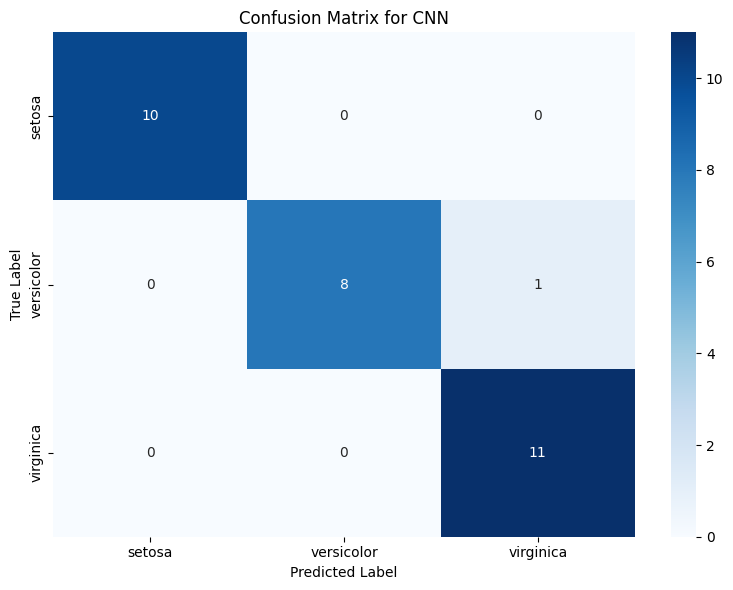

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your model and test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('Confusion Matrix for CNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png')

# Print classification report
print(classification_report(y_test, y_pred_classes, target_names=iris.target_names))

In [16]:
import os
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import joblib
import csv

# Create SVM_model directory
os.makedirs('SVM_model', exist_ok=True)

# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create output directories inside SVM_model
output_dirs = ['SVM_model/setosa', 'SVM_model/versicolor', 'SVM_model/virginica']
for dir_name in output_dirs:
    os.makedirs(dir_name, exist_ok=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Save model and scaler
joblib.dump(svm_model, 'SVM_model/iris_svm_model.pkl')
joblib.dump(scaler, 'SVM_model/iris_scaler.pkl')

# Predictions and classification report
y_pred = svm_model.predict(X_test_scaled)
print(f"Classification Report:\n{classification_report(y_test, y_pred, target_names=['setosa', 'versicolor', 'virginica'])}")

# Save samples to respective folders
flower_names = ['setosa', 'versicolor', 'virginica']
print("\nFile Sorting Details:")
for idx, (features, pred_label) in enumerate(zip(X_test, y_pred)):
    # Prepare filename
    filename = f'{output_dirs[pred_label]}/sample_{idx}.csv'
    
    # Save features to CSV
    with open(filename, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
        csv_writer.writerow(features)
    
    print(f"Sample {idx}: Features {features} -> Saved to {filename}")

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


File Sorting Details:
Sample 0: Features [6.1 2.8 4.7 1.2] -> Saved to SVM_model/versicolor/sample_0.csv
Sample 1: Features [5.7 3.8 1.7 0.3] -> Saved to SVM_model/setosa/sample_1.csv
Sample 2: Features [7.7 2.6 6.9 2.3] -> Saved to SVM_model/virginica/sample_2.csv
Sample 3: Features [6.  2.9 4.5 1.5] -> Saved to SVM_model/versicolor/sample_3.csv
Sample 4: Features [6.8 2.8 4.8 1.4] -> Saved to SVM_model/versicolor/sample_4.csv
Sample 5: Features [5.4 3.4 1.5 0.4] -> Saved to SVM_model/setosa/sample_5.csv
Sample 6: Features [5.6 2.9 3.6 1.3] -> Saved to SVM_model/versicolor/sample_6.csv
S

In [46]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from transformers import ViTForImageClassification, ViTImageProcessor
import logging

# Check for CUDA availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Create model directory (separate from data directory)
model_dir = 'VT_model'
os.makedirs(model_dir, exist_ok=True)

# Configure logging
logging.basicConfig(filename=f'{model_dir}/training_log.txt', 
                    level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s: %(message)s')

# Fix 1: Use proper data directory structure
# --------------------------------------------------
# You should have a separate data directory with subfolders
data_dir = 'dataset'  # Change this to your actual data path
subfolders = ['setosa', 'versicolour', 'virginica']
for folder in subfolders:
    os.makedirs(os.path.join(data_dir, folder), exist_ok=True)

# Fix 2: Use ViT's native preprocessing
# --------------------------------------------------
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=processor.image_mean, std=processor.image_std)
])

# Fix 3: Handle model dimension mismatch
# --------------------------------------------------
try:
    model = ViTForImageClassification.from_pretrained(
        'google/vit-base-patch16-224',
        num_labels=3,
        ignore_mismatched_sizes=True  # Critical fix for output layer
    ).to(device)
except Exception as e:
    logging.error(f"Model loading failed: {str(e)}")
    raise

# Fix 4: Add dataset validation
# --------------------------------------------------
try:
    dataset = ImageFolder(root=data_dir, transform=transform)
    if len(dataset) == 0:
        raise ValueError("No images found in dataset directory")
    
    # Add train-validation split
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16)
except Exception as e:
    logging.error(f"Data loading failed: {str(e)}")
    raise

# Fix 5: Add proper training configuration
# --------------------------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)  # Better for ViT
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

# Fix 6: Add validation and model checkpointing
# --------------------------------------------------
best_val_loss = float('inf')

logging.info("Starting Vision Transformer Training")
num_epochs = 30

for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0
    
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    # Validation phase
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs.logits, labels)
            val_loss += loss.item()
    
    # Calculate metrics
    avg_train_loss = train_loss / len(train_loader)
    avg_val_loss = val_loss / len(val_loader)
    scheduler.step()
    
    # Save best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), f'{model_dir}/best_vit_model.pth')
    
    # Logging
    log_msg = (f"Epoch {epoch+1}/{num_epochs} | "
               f"Train Loss: {avg_train_loss:.4f} | "
               f"Val Loss: {avg_val_loss:.4f}")
    logging.info(log_msg)
    print(log_msg)

# Final save
torch.save(model.state_dict(), f'{model_dir}/final_vit_model.pth')
logging.info("Model training completed and saved")

print("Training complete. Check VT_model/training_log.txt for details.")

Using device: cuda


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30 | Train Loss: 0.8977 | Val Loss: 0.8581
Epoch 2/30 | Train Loss: 0.5932 | Val Loss: 0.7749
Epoch 3/30 | Train Loss: 0.4010 | Val Loss: 0.7790
Epoch 4/30 | Train Loss: 0.2590 | Val Loss: 0.7789
Epoch 5/30 | Train Loss: 0.1828 | Val Loss: 0.7879
Epoch 6/30 | Train Loss: 0.1468 | Val Loss: 0.7999
Epoch 7/30 | Train Loss: 0.1266 | Val Loss: 0.8108
Epoch 8/30 | Train Loss: 0.1136 | Val Loss: 0.8219
Epoch 9/30 | Train Loss: 0.1062 | Val Loss: 0.8380
Epoch 10/30 | Train Loss: 0.1033 | Val Loss: 0.8365
Epoch 11/30 | Train Loss: 0.1024 | Val Loss: 0.8365
Epoch 12/30 | Train Loss: 0.1028 | Val Loss: 0.8408
Epoch 13/30 | Train Loss: 0.1029 | Val Loss: 0.8360
Epoch 14/30 | Train Loss: 0.1052 | Val Loss: 0.8404
Epoch 15/30 | Train Loss: 0.1104 | Val Loss: 0.8634
Epoch 16/30 | Train Loss: 0.1069 | Val Loss: 0.8716
Epoch 17/30 | Train Loss: 0.1026 | Val Loss: 0.9165
Epoch 18/30 | Train Loss: 0.1021 | Val Loss: 0.8656
Epoch 19/30 | Train Loss: 0.1054 | Val Loss: 0.9290
Epoch 20/30 | Train L

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_6509/547636442.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. T

Classification Report:
              precision    recall  f1-score   support

      setosa       0.96      0.81      0.88        67
 versicolour       0.88      0.95      0.92       269
   virginica       0.83      0.73      0.78        85

    accuracy                           0.88       421
   macro avg       0.89      0.83      0.86       421
weighted avg       0.88      0.88      0.88       421



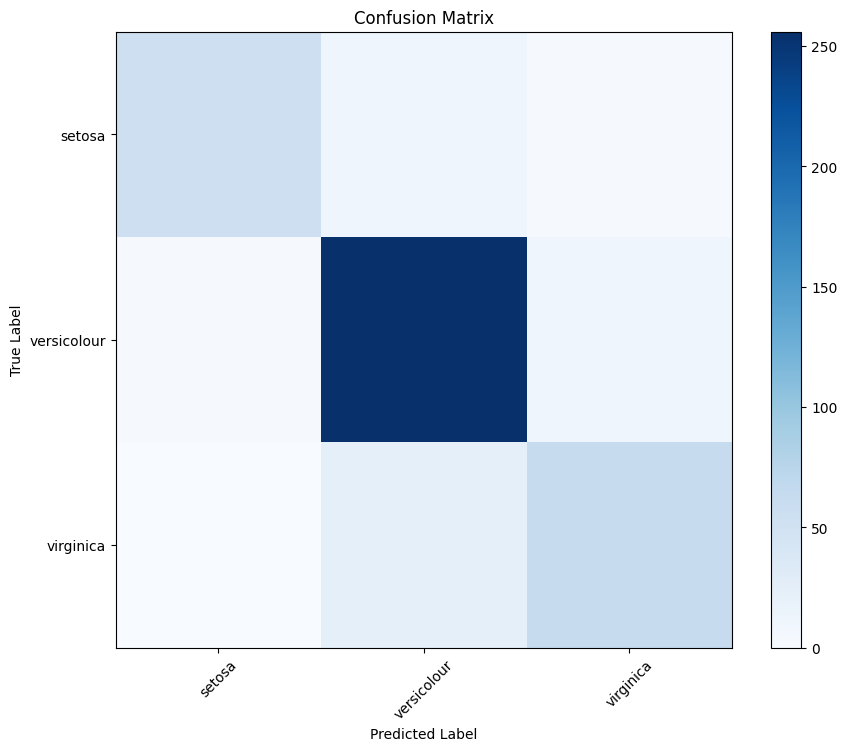

Test Accuracy: 0.8836


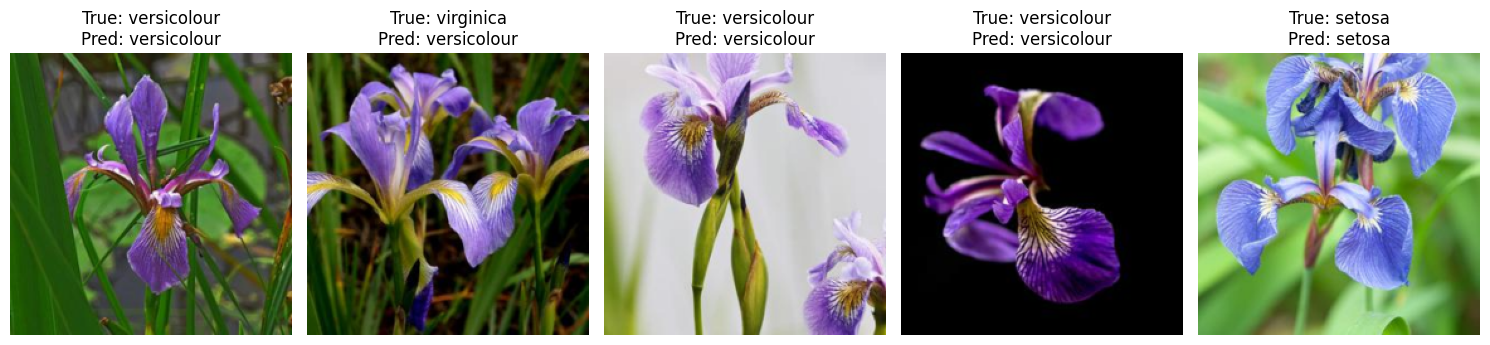

In [47]:
import torch
import numpy as np
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from transformers import ViTImageProcessor
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import os

# Configuration
test_dir = '/media/ankit15/Personal/AnkitCode/Irisdata-model/dataset'  # Update this path
model_path = '/media/ankit15/Personal/AnkitCode/Irisdata-model/VT_1_model/best_vit_model.pth'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load processor and model
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224',
    num_labels=3,
    ignore_mismatched_sizes=True
).to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# Test transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=processor.image_mean, std=processor.image_std)
])

# Load test dataset
test_dataset = ImageFolder(root=test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Get class names
class_names = test_dataset.classes

def test_model():
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, preds = torch.max(outputs.logits, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Generate metrics
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    
    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10,8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Calculate accuracy
    accuracy = np.sum(np.array(all_preds) == np.array(all_labels)) / len(all_labels)
    print(f"Test Accuracy: {accuracy:.4f}")

def visualize_predictions(num_samples=5):
    # Get random test samples
    indices = torch.randperm(len(test_dataset))[:num_samples]
    
    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(indices):
        # Get original tensor and label
        image_tensor, true_label = test_dataset[idx]
        
        # Create numpy copy for visualization
        image_np = image_tensor.numpy().transpose((1, 2, 0))
        image_np = image_np * np.array(processor.image_std) + np.array(processor.image_mean)
        image_np = np.clip(image_np, 0, 1)
        
        # Make prediction using original tensor
        with torch.no_grad():
            inputs = image_tensor.unsqueeze(0).to(device)  # Add batch dimension
            outputs = model(inputs)
            _, pred_label = torch.max(outputs.logits, 1)
        
        # Plot results
        plt.subplot(1, num_samples, i+1)
        plt.imshow(image_np)
        plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label.item()]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    test_model()
    visualize_predictions()

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_6509/3415910359.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. 

Classification Report:
              precision    recall  f1-score   support

      setosa       0.98      0.94      0.96        67
 versicolour       0.92      0.97      0.94       269
   virginica       0.92      0.76      0.83        85

    accuracy                           0.93       421
   macro avg       0.94      0.89      0.91       421
weighted avg       0.93      0.93      0.92       421



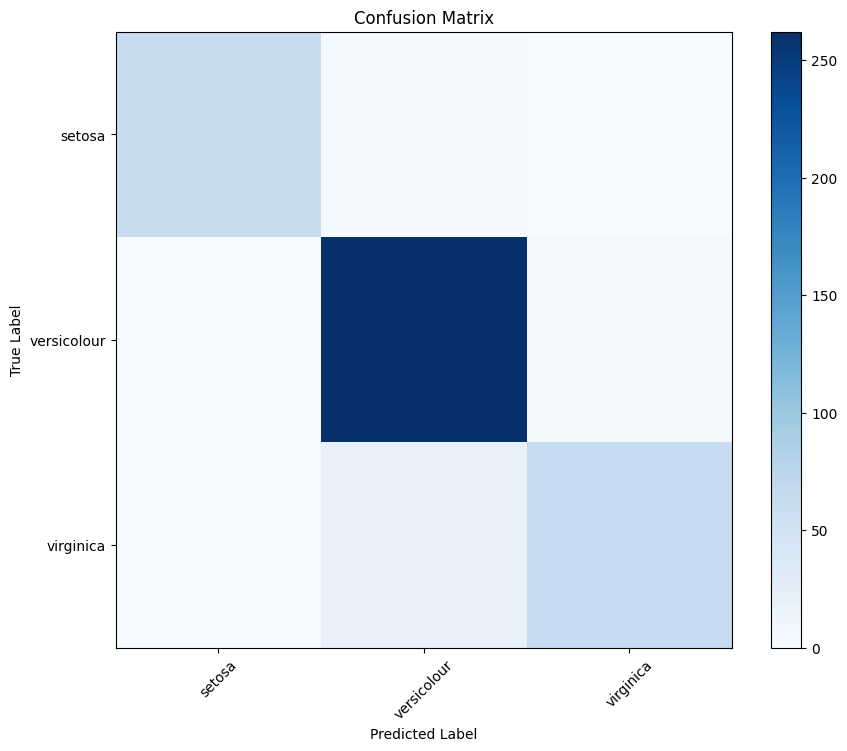

Test Accuracy: 0.9264


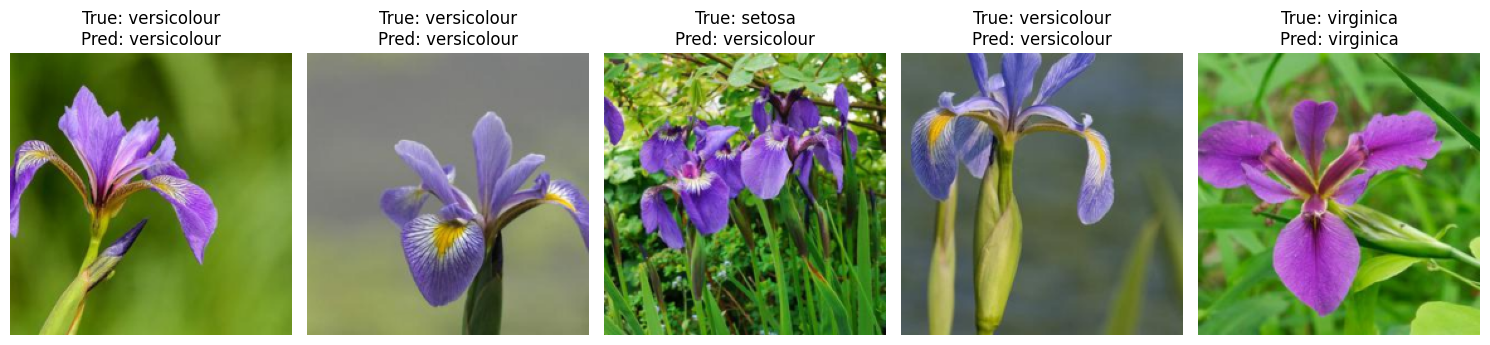

In [48]:
import torch
import numpy as np
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from transformers import ViTImageProcessor
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import os

# Configuration
test_dir = '/media/ankit15/Personal/AnkitCode/Irisdata-model/dataset'  # Update this path
model_path = '/media/ankit15/Personal/AnkitCode/Irisdata-model/VT_1_model/final_vit_model.pth'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load processor and model
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224',
    num_labels=3,
    ignore_mismatched_sizes=True
).to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# Test transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=processor.image_mean, std=processor.image_std)
])

# Load test dataset
test_dataset = ImageFolder(root=test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Get class names
class_names = test_dataset.classes

def test_model():
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, preds = torch.max(outputs.logits, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Generate metrics
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    
    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10,8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Calculate accuracy
    accuracy = np.sum(np.array(all_preds) == np.array(all_labels)) / len(all_labels)
    print(f"Test Accuracy: {accuracy:.4f}")

def visualize_predictions(num_samples=5):
    # Get random test samples
    indices = torch.randperm(len(test_dataset))[:num_samples]
    
    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(indices):
        # Get original tensor and label
        image_tensor, true_label = test_dataset[idx]
        
        # Create numpy copy for visualization
        image_np = image_tensor.numpy().transpose((1, 2, 0))
        image_np = image_np * np.array(processor.image_std) + np.array(processor.image_mean)
        image_np = np.clip(image_np, 0, 1)
        
        # Make prediction using original tensor
        with torch.no_grad():
            inputs = image_tensor.unsqueeze(0).to(device)  # Add batch dimension
            outputs = model(inputs)
            _, pred_label = torch.max(outputs.logits, 1)
        
        # Plot results
        plt.subplot(1, num_samples, i+1)
        plt.imshow(image_np)
        plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label.item()]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    test_model()
    visualize_predictions()

In [52]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
import tensorflow as tf
from transformers import ViTForImageClassification, ViTFeatureExtractor
import torch
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Iris dataset
data = datasets.load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, predict_fn):
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)  # Train the model
    train_time = time.time() - start_time

    # Measure inference time
    start_time = time.time()
    y_pred = predict_fn(X_test)
    inference_time = time.time() - start_time

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=data.target_names)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", cm)
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Inference Time: {inference_time:.4f} seconds")
    print("-" * 50)

    return accuracy, train_time, inference_time

# SVM Evaluation
svm_model = SVC(kernel='linear')
svm_results = evaluate_model(
    svm_model,
    X_train,
    y_train,
    X_test,
    y_test,
    "SVM",
    lambda X: svm_model.predict(X),
)

# CNN Evaluation
def build_cnn(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = build_cnn((X_train.shape[1],), len(np.unique(y)))

# CNN Training
start_time = time.time()
cnn_model.fit(X_train, y_train, epochs=50, verbose=0)
cnn_train_time = time.time() - start_time

# CNN Evaluation
start_time = time.time()
cnn_predictions = np.argmax(cnn_model.predict(X_test), axis=-1)
cnn_inference_time = time.time() - start_time

cnn_accuracy = accuracy_score(y_test, cnn_predictions)
evaluate_model(cnn_model, X_train, y_train, X_test, y_test, "CNN", lambda X: cnn_predictions)

# ViT Evaluation
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
vit_model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224',
    num_labels=3,
    ignore_mismatched_sizes=True
)

# Preprocessing for ViT
def preprocess_vit(X):
    # Normalize and add batch dimension
    images = X.reshape(-1, 1, 4, 4)  # Example for simple image mapping
    inputs = feature_extractor(images=images.tolist(), return_tensors="pt")
    return inputs

vit_inputs = preprocess_vit(X_test)

# ViT Training and Inference (if applicable)
start_time = time.time()
outputs = vit_model.eval_with()


Model: SVM
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Training Time: 0.0016 seconds
Inference Time: 0.0004 seconds
--------------------------------------------------


/media/ankit15/Personal/AnkitCode/Irisdata-model/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9629 - loss: 0.3098 
Model: CNN
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Training Time: 0.0915 seconds
Inference Time: 0.0000 seconds
--------------------------------------------------


/media/ankit15/Personal/AnkitCode/Irisdata-model/myenv/lib/python3.12/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: cannot reshape array of size 180 into shape (1,4,4)

In [55]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import time
import numpy as np

# Load the Iris dataset
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data = datasets.load_iris()
X = data.data
y = data.target

# One-hot encode the target labels
y = to_categorical(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((2, 2, 1), input_shape=(4,)),  # Reshape to fit CNN input
    tf.keras.layers.Conv2D(32, kernel_size=(2, 2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
start_train_time = time.time()
history = model.fit(X_train, y_train, epochs=20, batch_size=8, verbose=0)
train_time = time.time() - start_train_time

# Evaluate the model
start_inference_time = time.time()
y_pred_probs = model.predict(X_test)  # Predicted probabilities
inference_time = time.time() - start_inference_time

# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate performance metrics
accuracy = np.mean(y_pred == y_true)
classification_rep = classification_report(y_true, y_pred, target_names=data.target_names, output_dict=True)
conf_matrix = confusion_matrix(y_true, y_pred)

# Prepare data for a single consolidated CSV
# Performance metrics
performance_metrics = pd.DataFrame({
    "Metric": ["Accuracy", "Training Time (s)", "Inference Time (s)"],
    "Value": [accuracy, train_time, inference_time]
})

# Classification report
classification_report_df = pd.DataFrame(classification_rep).transpose()
classification_report_df.reset_index(inplace=True)
classification_report_df.rename(columns={"index": "Class"}, inplace=True)

# Confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=data.target_names, columns=data.target_names)
conf_matrix_df.reset_index(inplace=True)
conf_matrix_df.rename(columns={"index": "Actual/Predicted"}, inplace=True)

# Combine all into a single CSV
with pd.ExcelWriter("cnn_evaluation_metrics.xlsx") as writer:
    performance_metrics.to_excel(writer, sheet_name="Performance Metrics", index=False)
    classification_report_df.to_excel(writer, sheet_name="Classification Report", index=False)
    conf_matrix_df.to_excel(writer, sheet_name="Confusion Matrix", index=False)

# Print confirmation
print("All evaluation metrics saved in 'cnn_evaluation_metrics.xlsx'")


/media/ankit15/Personal/AnkitCode/Irisdata-model/myenv/lib/python3.12/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
All evaluation metrics saved in 'cnn_evaluation_metrics.xlsx'


In [56]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import time
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the Iris dataset
data = datasets.load_iris()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the SVM model
start_train_time = time.time()
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predict using the SVM model
start_inference_time = time.time()
y_pred = svm_model.predict(X_test)
inference_time = time.time() - start_inference_time

# Calculate performance metrics
accuracy = svm_model.score(X_test, y_test)
classification_rep = classification_report(y_test, y_pred, target_names=data.target_names, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Prepare data for a single consolidated CSV
performance_metrics = pd.DataFrame({
    "Metric": ["Accuracy", "Training Time (s)", "Inference Time (s)"],
    "Value": [accuracy, train_time, inference_time]
})

classification_report_df = pd.DataFrame(classification_rep).transpose()
classification_report_df.reset_index(inplace=True)
classification_report_df.rename(columns={"index": "Class"}, inplace=True)

conf_matrix_df = pd.DataFrame(conf_matrix, index=data.target_names, columns=data.target_names)
conf_matrix_df.reset_index(inplace=True)
conf_matrix_df.rename(columns={"index": "Actual/Predicted"}, inplace=True)

# Save all results to a single CSV file
with pd.ExcelWriter("svm_evaluation_metrics.xlsx") as writer:
    performance_metrics.to_excel(writer, sheet_name="Performance Metrics", index=False)
    classification_report_df.to_excel(writer, sheet_name="Classification Report", index=False)
    conf_matrix_df.to_excel(writer, sheet_name="Confusion Matrix", index=False)

print("SVM evaluation metrics saved in 'svm_evaluation_metrics.xlsx'")


SVM evaluation metrics saved in 'svm_evaluation_metrics.xlsx'


In [1]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from sklearn.metrics import classification_report, confusion_matrix
import torch
import pandas as pd
import time
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, Resize, ToTensor
from torch.utils.data import DataLoader
import numpy as np

# Set up a feature extractor and load the pre-trained ViT model
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224',
    num_labels=3,  # Update based on the number of classes
    ignore_mismatched_sizes=True
)

# Prepare the dataset
transform = Compose([Resize((224, 224)), ToTensor()])
# Replace 'path_to_iris_dataset' with the actual path to your dataset
dataset = ImageFolder(root='/media/ankit15/Personal/AnkitCode/Irisdata-model/dataset', transform=transform)
data_loader = DataLoader(dataset, batch_size=4, shuffle=True)  # Reduced batch size


# Train the model (fine-tuning)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
loss_fn = torch.nn.CrossEntropyLoss()

start_train_time = time.time()
model.train()
for epoch in range(2):  # Change epochs for better fine-tuning
    for inputs, labels in data_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(pixel_values=inputs).logits
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
train_time = time.time() - start_train_time

# Evaluate the model
model.eval()
all_preds, all_labels = [], []
start_inference_time = time.time()
with torch.no_grad():
    for inputs, labels in data_loader:
        inputs = inputs.to(device)
        outputs = model(pixel_values=inputs).logits
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
inference_time = time.time() - start_inference_time

# Calculate performance metrics
accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
classification_rep = classification_report(all_labels, all_preds, output_dict=True)
conf_matrix = confusion_matrix(all_labels, all_preds)

# Prepare data for a single consolidated CSV
performance_metrics = pd.DataFrame({
    "Metric": ["Accuracy", "Training Time (s)", "Inference Time (s)"],
    "Value": [accuracy, train_time, inference_time]
})

classification_report_df = pd.DataFrame(classification_rep).transpose()
classification_report_df.reset_index(inplace=True)
classification_report_df.rename(columns={"index": "Class"}, inplace=True)

conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df.reset_index(inplace=True)
conf_matrix_df.rename(columns={"index": "Actual/Predicted"}, inplace=True)

# Save all results to a single CSV file
with pd.ExcelWriter("vit_evaluation_metrics.xlsx") as writer:
    performance_metrics.to_excel(writer, sheet_name="Performance Metrics", index=False)
    classification_report_df.to_excel(writer, sheet_name="Classification Report", index=False)
    conf_matrix_df.to_excel(writer, sheet_name="Confusion Matrix", index=False)

print("ViT evaluation metrics saved in 'vit_evaluation_metrics.xlsx'")


/media/ankit15/Personal/AnkitCode/Irisdata-model/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-01-24 22:32:59.182764: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737738179.253576    3839 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737738179.275870    3839 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-24 22:32:59.427401: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructio

ViT evaluation metrics saved in 'vit_evaluation_metrics.xlsx'


/tmp/ipykernel_3839/3656770353.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette='viridis')


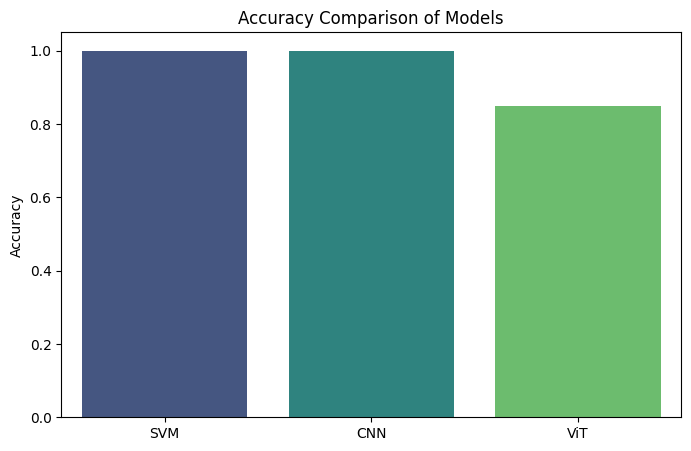

/tmp/ipykernel_3839/3656770353.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=train_time, palette='viridis')


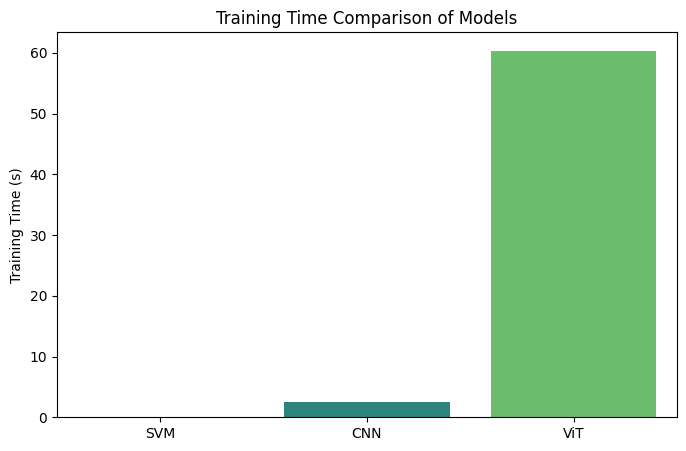

/tmp/ipykernel_3839/3656770353.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=inference_time, palette='viridis')


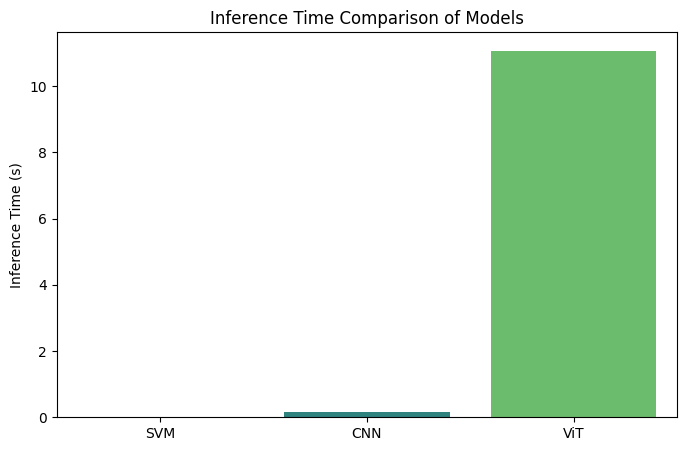

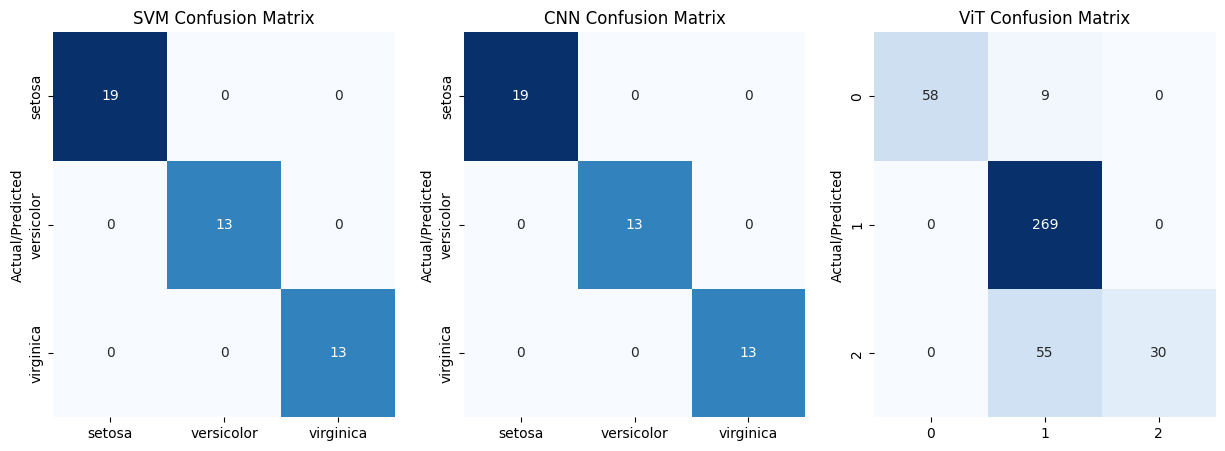

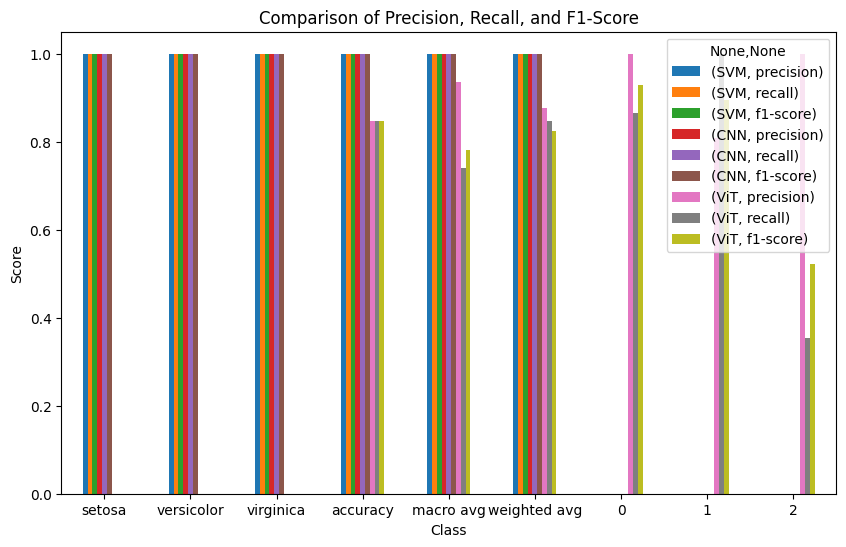

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the CSV files (SVM, CNN, ViT)
svm_metrics = pd.read_excel("svm_evaluation_metrics.xlsx", sheet_name="Performance Metrics")
cnn_metrics = pd.read_excel("cnn_evaluation_metrics.xlsx", sheet_name="Performance Metrics")
vit_metrics = pd.read_excel("vit_evaluation_metrics.xlsx", sheet_name="Performance Metrics")

svm_classification_report = pd.read_excel("svm_evaluation_metrics.xlsx", sheet_name="Classification Report")
cnn_classification_report = pd.read_excel("cnn_evaluation_metrics.xlsx", sheet_name="Classification Report")
vit_classification_report = pd.read_excel("vit_evaluation_metrics.xlsx", sheet_name="Classification Report")

svm_confusion_matrix = pd.read_excel("svm_evaluation_metrics.xlsx", sheet_name="Confusion Matrix", index_col=0)
cnn_confusion_matrix = pd.read_excel("cnn_evaluation_metrics.xlsx", sheet_name="Confusion Matrix", index_col=0)
vit_confusion_matrix = pd.read_excel("vit_evaluation_metrics.xlsx", sheet_name="Confusion Matrix", index_col=0)

# Visualization 1: Comparison of Accuracy
models = ['SVM', 'CNN', 'ViT']
accuracy = [
    svm_metrics[svm_metrics['Metric'] == 'Accuracy']['Value'].values[0],
    cnn_metrics[cnn_metrics['Metric'] == 'Accuracy']['Value'].values[0],
    vit_metrics[vit_metrics['Metric'] == 'Accuracy']['Value'].values[0]
]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracy, palette='viridis')
plt.title('Accuracy Comparison of Models')
plt.ylabel('Accuracy')
plt.show()

# Visualization 2: Comparison of Training Time
train_time = [
    svm_metrics[svm_metrics['Metric'] == 'Training Time (s)']['Value'].values[0],
    cnn_metrics[cnn_metrics['Metric'] == 'Training Time (s)']['Value'].values[0],
    vit_metrics[vit_metrics['Metric'] == 'Training Time (s)']['Value'].values[0]
]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=train_time, palette='viridis')
plt.title('Training Time Comparison of Models')
plt.ylabel('Training Time (s)')
plt.show()

# Visualization 3: Comparison of Inference Time
inference_time = [
    svm_metrics[svm_metrics['Metric'] == 'Inference Time (s)']['Value'].values[0],
    cnn_metrics[cnn_metrics['Metric'] == 'Inference Time (s)']['Value'].values[0],
    vit_metrics[vit_metrics['Metric'] == 'Inference Time (s)']['Value'].values[0]
]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=inference_time, palette='viridis')
plt.title('Inference Time Comparison of Models')
plt.ylabel('Inference Time (s)')
plt.show()

# Visualization 4: Confusion Matrix Heatmaps for each model
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(svm_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('SVM Confusion Matrix')

sns.heatmap(cnn_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('CNN Confusion Matrix')

sns.heatmap(vit_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[2])
axes[2].set_title('ViT Confusion Matrix')

plt.show()

# Visualization 5: Classification Report Metrics (Precision, Recall, F1-Score)
# SVM Classification Report Metrics
svm_metrics_report = svm_classification_report.set_index('Class')[['precision', 'recall', 'f1-score']]
cnn_metrics_report = cnn_classification_report.set_index('Class')[['precision', 'recall', 'f1-score']]
vit_metrics_report = vit_classification_report.set_index('Class')[['precision', 'recall', 'f1-score']]

# Combine all classification reports
combined_report = pd.concat([svm_metrics_report, cnn_metrics_report, vit_metrics_report], axis=1, keys=['SVM', 'CNN', 'ViT'])

# Plot the metrics
combined_report.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Precision, Recall, and F1-Score')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()
